In [1]:
%set_env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datasetsforecast.long_horizon import LongHorizon

from neuralforecast.core import NeuralForecast
from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.models import SOFTS, PatchTST, TSMixer, iTransformer

from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

In [3]:
def load_data(name):
    if name == "ettm1":
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm1')
        Y_df = Y_df[Y_df['unique_id'] == 'OT'] # univariate dataset
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        val_size = 11520
        test_size = 11520
        freq = '15T'
    elif name == "ettm2":
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm2')
        Y_df['ds'] = pd.to_datetime(Y_df['ds']) 
        val_size = 11520
        test_size = 11520
        freq = '15T'

    return Y_df, val_size, test_size, freq

## Univariate forecasting

In [4]:
Y_df, val_size, test_size, freq = load_data('ettm1')

horizon = 96

models = [
    SOFTS(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    TSMixer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    iTransformer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    PatchTST(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3)
]

nf = NeuralForecast(models=models, freq=freq)
nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

ettm1_evaluation = evaluate(df=nf_preds, metrics=[mae, mse], models=['SOFTS', 'TSMixer', 'iTransformer', 'PatchTST'])
ettm1_evaluation.to_csv('ettm1_results.csv', index=False, header=True)

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /var/folders/g1/xrd363zx571_wq54f3htnbxr0000gn/T/tmpahcfbz0o
INFO:torch.distributed.nn.jit.instantiator:Writing /var/folders/g1/xrd363zx571_wq54f3htnbxr0000gn/T/tmpahcfbz0o/_remote_module_non_scriptable.py
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params
---------------------------------------------------------
0 | loss          | MAE          

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/miniconda3/envs/neuralforecast/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                     | Params
-----------------------------------------------------------
0 | loss          | MAE                      | 0     
1 | padder        | ConstantPad1d            | 0     
2 | scaler        | TemporalNorm             | 0     
3 | norm          | ReversibleInstanceNorm1d | 2     
4 | mixing_layers | Sequential               | 169 K 
5 | out           | Linear                   | 27.7 K
-----------------------------------------------------------
196 K     Trainable params
0         Non-trainable params
196 K     Total params
0.788     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params
---------------------------------------------------------
0 | loss          | MAE                    | 0     
1 | padder        | ConstantPad1d          | 0     
2 | scaler        | TemporalNorm           | 0     
3 | enc_embedding | DataEmbedding_inverted | 147 K 
4 | encoder       | TransEncoder           | 6.3 M 
5 | projector     | Linear                 | 49.2 K
---------------------------------------------------------
6.5 M     Trainable params
0         Non-trainable params
6.5 M     Total params
26.012    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | MAE               | 0     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 846 K 
---------------------------------------------------
846 K     Trainable params
3         Non-trainable params
846 K     Total params
3.387     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/dev/neuralforecast/neuralforecast/common/_base_windows.py:325: UserWarning: MPS: no support for int64 repeats mask, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Repeat.mm:236.)
  y_scale = torch.repeat_interleave(y_scale, repeats=y_hat.shape[-1], dim=-1).to(
/Users/marcopeix/dev/neuralforecast/neuralforecast/common/_base_windows.py:558: UserWarning: MPS: no support for int64 reduction ops, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/ReduceOps.mm:144.)
  batch_size = torch.sum(batch_sizes)


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/dev/neuralforecast/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


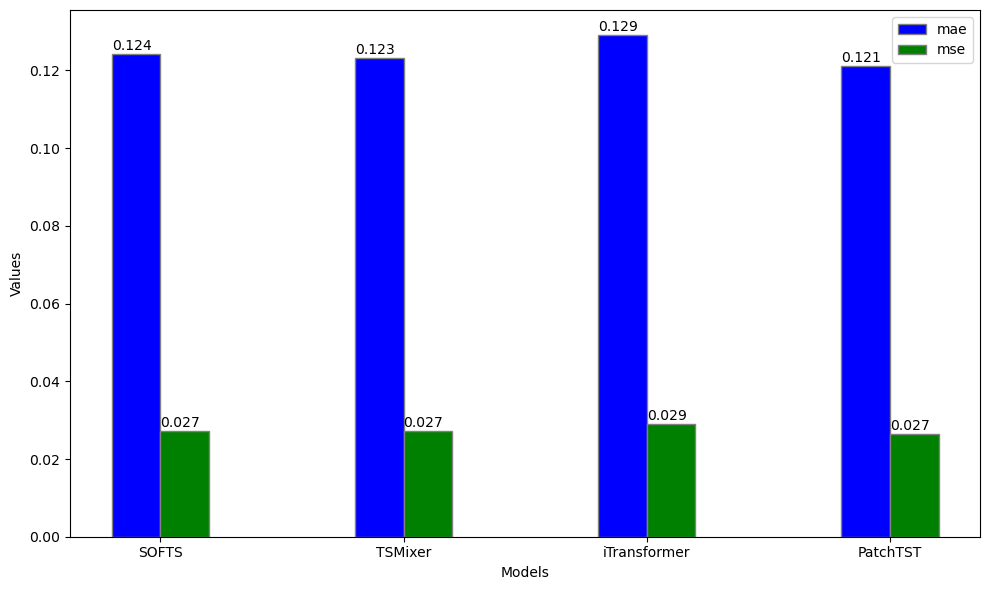

In [10]:
metrics_df = pd.read_csv('ettm1_results.csv')

metrics = metrics_df['metric']
models = metrics_df.columns[2:]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

r1 = range(len(models))
r2 = [x + bar_width for x in r1]

ax.bar(r1, metrics_df[metrics_df['metric'] == 'mae'].values[0][2:], color='b', width=bar_width, edgecolor='grey', label='mae')
ax.bar(r2, metrics_df[metrics_df['metric'] == 'mse'].values[0][2:], color='g', width=bar_width, edgecolor='grey', label='mse')

for i, v in enumerate(metrics_df[metrics_df['metric'] == 'mae'].values[0][2:]):
    ax.text(i - 0.1, v + 0.001, str(round(v, 3)))
for i, v in enumerate(metrics_df[metrics_df['metric'] == 'mse'].values[0][2:]):
    ax.text(i + bar_width - 0.1, v + 0.001, str(round(v, 3)))

ax.set_xlabel('Models')
ax.set_ylabel('Values')

ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models)

ax.legend()

plt.tight_layout()


## Multivariate forecasting

In [11]:
Y_df, val_size, test_size, freq = load_data('ettm2')

horizon = 96

In [12]:
models = [SOFTS(h=horizon, input_size=3*horizon, n_series=7, max_steps=1000, early_stop_patience_steps=3, scaler_type='identity', valid_loss=MAE()),
          TSMixer(h=horizon, input_size=3*horizon, n_series=7, max_steps=1000, early_stop_patience_steps=3, scaler_type='identity', valid_loss=MAE()),
          iTransformer(h=horizon, input_size=3*horizon, n_series=7, max_steps=1000, early_stop_patience_steps=3, scaler_type='identity', valid_loss=MAE())]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [13]:
nf = NeuralForecast(models=models, freq='15min')

nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

ettm2_evaluation = evaluate(df=nf_preds, metrics=[mae, mse], models=['SOFTS', 'TSMixer', 'iTransformer'])
ettm2_evaluation.to_csv('ettm2_results.csv', index=False, header=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params
---------------------------------------------------------
0 | loss          | MAE                    | 0     
1 | valid_loss    | MAE                    | 0     
2 | padder        | ConstantPad1d          | 0     
3 | scaler        | TemporalNorm           | 0     
4 | enc_embedding | DataEmbedding_inverted | 147 K 
5 | encoder       | TransEncoder           | 6.8 M 
6 | projection    | Linear                 | 49.2 K
---------------------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
28.105    Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                     | Params
-----------------------------------------------------------
0 | loss          | MAE                      | 0     
1 | valid_loss    | MAE                      | 0     
2 | padder        | ConstantPad1d            | 0     
3 | scaler        | TemporalNorm             | 0     
4 | norm          | ReversibleInstanceNorm1d | 14    
5 | mixing_layers | Sequential               | 184 K 
6 | out           | Linear                   | 27.7 K
-----------------------------------------------------------
212 K     Trainable params
0         Non-trainable params
212 K     Total par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params
---------------------------------------------------------
0 | loss          | MAE                    | 0     
1 | valid_loss    | MAE                    | 0     
2 | padder        | ConstantPad1d          | 0     
3 | scaler        | TemporalNorm           | 0     
4 | enc_embedding | DataEmbedding_inverted | 147 K 
5 | encoder       | TransEncoder           | 6.3 M 
6 | projector     | Linear                 | 49.2 K
---------------------------------------------------------
6.5 M     Trainable params
0         Non-trainable params
6.5 M     Total params
26.012    Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/dev/neuralforecast/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [14]:
ettm2_metrics = pd.read_csv("ettm2_results.csv")

ettm2_metrics['SOFTS'] = pd.to_numeric(ettm2_metrics['SOFTS'], errors='coerce')
ettm2_metrics['TSMixer'] = pd.to_numeric(ettm2_metrics['TSMixer'], errors='coerce')
ettm2_metrics['iTransformer'] = pd.to_numeric(ettm2_metrics['iTransformer'], errors='coerce')

average_metrics = ettm2_metrics.groupby('metric').agg({
    'SOFTS': 'mean',
    'TSMixer': 'mean',
    'iTransformer': 'mean'
}).reset_index()

average_metrics

,metric,SOFTS,TSMixer,iTransformer
0,mae,0.328205,0.248595,0.338629
1,mse,0.253429,0.166560,0.270181


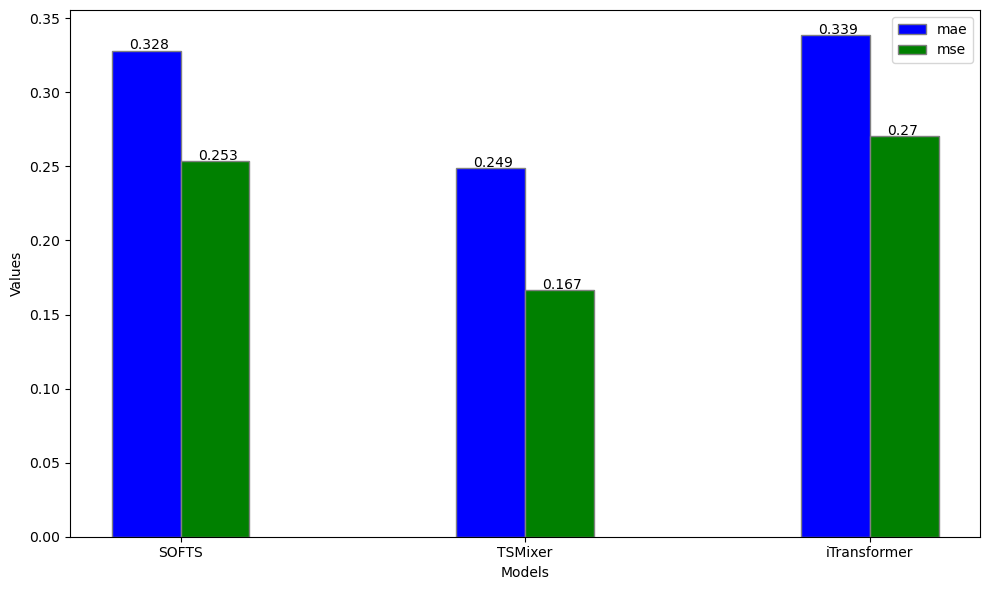

In [22]:
metrics = average_metrics['metric']
models = average_metrics.columns[1:]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

r1 = range(len(models))
r2 = [x + bar_width for x in r1]

ax.bar(r1, average_metrics[metrics_df['metric'] == 'mae'].values[0][1:], color='b', width=bar_width, edgecolor='grey', label='mae')
ax.bar(r2, average_metrics[metrics_df['metric'] == 'mse'].values[0][1:], color='g', width=bar_width, edgecolor='grey', label='mse')

for i, v in enumerate(average_metrics[average_metrics['metric'] == 'mae'].values[0][1:]):
    ax.text(i - 0.05, v + 0.001, str(round(v, 3)))
for i, v in enumerate(average_metrics[average_metrics['metric'] == 'mse'].values[0][1:]):
    ax.text(i + bar_width - 0.05, v + 0.001, str(round(v, 3)))

ax.set_xlabel('Models')
ax.set_ylabel('Values')

ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models)

ax.legend()

plt.tight_layout()
